In [46]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [6.5, 5]

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams['axes.labelsize'] = 30
plt.rcParams["axes.linewidth"] = 2.5
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["lines.linewidth"] = 3

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 3
plt.rcParams['ytick.minor.width'] = 3
plt.rcParams['xtick.minor.visible'] =  True
plt.rcParams['ytick.minor.visible'] =  True


plt.rcParams['legend.fontsize'] = 25
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.markerscale'] = 1

plt.rcParams['savefig.dpi'] = 500
plt.rcParams['savefig.bbox'] = 'tight'

matplotlib.rc('font', weight='bold')

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Function to compute the force on particles in a 2D Lennard-Jones potential
def force(pos):
    f = np.zeros((len(pos),2))
    for i in range(len(pos)-1):
        for j in range(i+1, len(pos)):
            r = np.linalg.norm(pos[i]-pos[j])
            fij = (6/r**2)*(2/r**12 - 1/r**6)*(pos[i]-pos[j])
            f[i] += fij
            f[j] -= fij
    # Compute maximum force (magnitude)
    maxf = np.linalg.norm(f,axis=1).max()
    return maxf, f # Return a tuple: both max f, and force array

In [49]:
def potnrg(pos):
    nrg = 0.0
    allnrg = np.zeros(len(pos))
    for i in range(len(pos)-1):
        for j in range(i+1, len(pos)):
            r = np.linalg.norm(pos[i]-pos[j])
            nrg += 1/r**12 - 1/r**6
            allnrg[i] += nrg
            allnrg[j] += nrg
    return nrg, allnrg

In [50]:
# Initialise coordinates on a square grid with spacing 1.5 units
def create_grid(npart):
    pos = np.zeros((npart,2))
    boxl = int(np.ceil(np.sqrt(npart)))
    for i in range(boxl):
        for j in range(boxl):
            pos[boxl*i+j] = 1.3*np.array([i,j])
    return pos

In [51]:
def create_random(npart, spacing):
    return np.random.random((npart,2))*spacing

In [52]:
# Initialise simulation parameters
boxl = 5
npart = boxl**2 # Number of particles
steps = 1000
tol = 1.0e-3

In [53]:
# Choose any of the following two methods for creating
# initial structure ...
pos = create_random(npart, 2.0)
#pos = create_grid(npart)

In [54]:

pos_init = pos.copy() # Initial position saved for plotting later

#Steepest descent starts
for step in range(steps):
    alpha = 0.01
    maxf, f = force(pos)
    if maxf > 10:
        # alpha = alpha / maxf
        alpha /= maxf
    pos += alpha*f

    print(step, ": Energy = ", potnrg(pos)[0], "Max. Force = ", maxf)

    if maxf < tol: # Convergence is checked by max force value, not energy
        np.savetxt("LJ-2D-config.dat", pos)
        print(f"Converged after {step} steps!")
        break

0 : Energy =  3603231234054776.5 Max. Force =  1.493120522473716e+19
1 : Energy =  331137137356634.25 Max. Force =  7.500219726129697e+17
2 : Energy =  42972978226962.11 Max. Force =  5.152024110903595e+16
3 : Energy =  8132386822618.419 Max. Force =  5040351669487644.0
4 : Energy =  2922605960430.1084 Max. Force =  610547697270541.8
5 : Energy =  921603283292.1116 Max. Force =  124702188674523.95
6 : Energy =  360453887240.68994 Max. Force =  33248871398450.758
7 : Energy =  142737250302.95074 Max. Force =  8328550123366.877
8 : Energy =  60406002012.177635 Max. Force =  2206972558900.81
9 : Energy =  35741208439.6201 Max. Force =  965086600022.937
10 : Energy =  20502552766.157047 Max. Force =  457200527495.89355
11 : Energy =  13648985308.881216 Max. Force =  319821684973.41187
12 : Energy =  9328935684.545694 Max. Force =  199655175151.2887
13 : Energy =  6567112251.49637 Max. Force =  140803858791.23605
14 : Energy =  4801683005.103821 Max. Force =  90788478668.58028
15 : Energy =

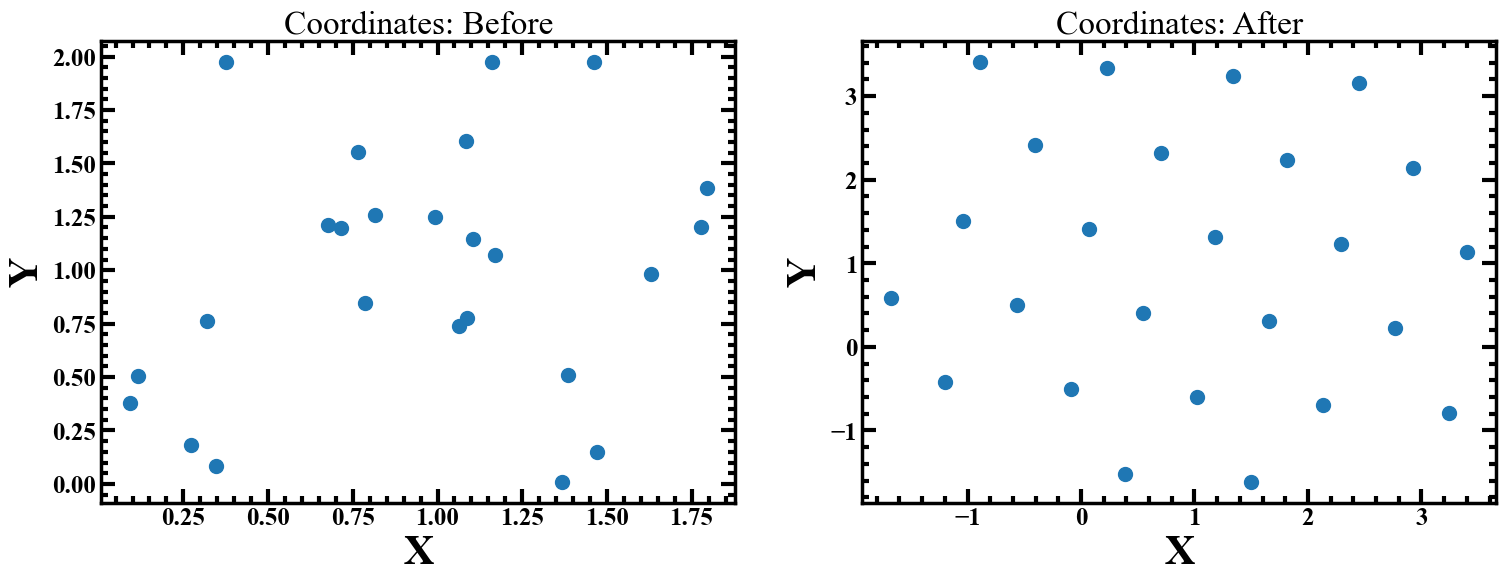

In [55]:
# Compare initial and final coordinates
col_init = potnrg(pos_init)[1]
col = potnrg(pos)[1]
plt.figure(1,figsize=(18, 6))
# Initial coordinates
plt.subplot(121)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Coordinates: Before')
plt.scatter(pos_init[:,0],pos_init[:,1],s=100) # ,c=col_init, cmap='magma') # Before

# Final coordinates
plt.subplot(122)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Coordinates: After')
plt.scatter(pos[:,0],pos[:,1],s=100) #,c=col, cmap='magma') # After
plt.show()